#NBFC Loan Default
###Context
A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.
The following is the story of a challenge faced by DHDL Ltd. (Name Changed), an NBFC in India. In recent times, the company is struggling to mark profits due to an increase in Loan Defaults. The company aims to determine the relative importance of each parameter with regards to their contribution as to whether a loan is going to default or not. Provided is a sample that contains the data of 90,000 + clients who have taken a loan from the company in the past with the information on whether the loan defaulted. 
The objective of this exercise is to understand which parameters play an important role in determining whether a client will default on the loan payment or not.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import(
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix
)
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data_Dictionary = pd.read_csv('/content/drive/MyDrive/Python Course/Data_Dictionary.csv')

In [ ]:
Data_Dictionary

,ID,unique ID assigned to each applicant
0,loan_amnt,loan amount ($) applied each applicant
1,loan_term,Loan duration in years
2,interest_rate,Applicable interest rate on Loan in %
3,loan_grade,Loan Grade Assigned by the bank
4,loan_subgrade,Loan SubGrade Assigned by the bank
5,job_experience,Number of years job experience
6,home_ownership,Status of House Ownership
7,annual_income,Annual income of the applicant
8,income_verification_status,Status of Income verification by the bank
9,loan_purpose,Purpose of loan


In [ ]:
train_set = pd.read_csv('/content/drive/MyDrive/Python Course/Train_set.csv')

In [ ]:
train_set.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [ ]:
train_set.shape

(93174, 23)

In [ ]:
test_set = pd.read_csv('/content/drive/MyDrive/Python Course/Test_set.csv')

In [ ]:
test_set.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,...,14.62,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.0,128098.0,25800.0
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.0,Not Verified,...,11.38,0.0,0.0,7592,14.0,202.68,INDIVIDUAL,13.0,269396.0,23600.0
2,3637416,15000,3 years,14.33,C,C1,6-10 years,MORTGAGE,50000.0,Verified,...,28.15,0.0,1.0,17983,19.0,1166.24,INDIVIDUAL,30.0,220135.0,34100.0
3,53682249,12000,3 years,9.99,B,B3,6-10 years,RENT,37000.0,Source Verified,...,34.32,0.0,0.0,12262,18.0,635.06,INDIVIDUAL,35.0,39436.0,21700.0
4,53937165,20150,3 years,11.53,B,B5,<5 Years,RENT,75000.0,Source Verified,...,26.74,1.0,0.0,8251,11.0,1232.84,INDIVIDUAL,31.0,52764.0,12000.0


In [ ]:
test_set.shape

(39933, 22)

In [ ]:
train = train_set.copy()
test = test_set.copy()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

- several columns have some null values
- There are 9 object columns, 4 integer columns, and 10 float columns

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  int64  
 1   loan_amnt                   39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinq_2yrs                 399

- we also have some null values in our test set
- there is one less column, default, in our test set as that is what we are trying to predict.

###Changing object type to category

In [ ]:
train['loan_term'] = train['loan_term'].astype('category')
train['loan_grade'] = train['loan_grade'].astype('category')
train['loan_subgrade'] = train['loan_subgrade'].astype('category')
train['job_experience'] = train['job_experience'].astype('category')
train['home_ownership'] = train['home_ownership'].astype('category')
train['income_verification_status'] = train['income_verification_status'].astype('category')
train['loan_purpose'] = train['loan_purpose'].astype('category')
train['state_code'] = train['state_code'].astype('category')
train['application_type'] = train['application_type'].astype('category')

In [ ]:
test['loan_term'] = test['loan_term'].astype('category')
test['loan_grade'] = test['loan_grade'].astype('category')
test['loan_subgrade'] = test['loan_subgrade'].astype('category')
test['job_experience'] = test['job_experience'].astype('category')
test['home_ownership'] = test['home_ownership'].astype('category')
test['income_verification_status'] = test['income_verification_status'].astype('category')
test['loan_purpose'] = test['loan_purpose'].astype('category')
test['state_code'] = test['state_code'].astype('category')
test['application_type'] = test['application_type'].astype('category')

In [ ]:
train_cat_cols = ['loan_term','loan_grade','loan_subgrade','job_experience','home_ownership','income_verification_status','loan_purpose','state_code','application_type']

In [ ]:
for column in train_cat_cols:
  print(train[column].value_counts())
  print('-'*50)

3 years    65211
5 years    27963
Name: loan_term, dtype: int64
--------------------------------------------------
B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: loan_grade, dtype: int64
--------------------------------------------------
B4    5879
B3    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: loan_subgrade, dtype: int64
--------------------------------------------------
<5 Years      40610
10+ years     30362
6-10 years    17500
Name: job_experience, dtype: int64
--------------------------------------------------
MORTGAGE    46445
RENT        37449
OWN          9254
OTHER          18
NONE            8
Name: home_ownership

In [ ]:
test_cat_cols = ['loan_term','loan_grade','loan_subgrade','job_experience','home_ownership','income_verification_status','loan_purpose','state_code','application_type']

In [ ]:
for column in test_cat_cols:
  print(test[column].value_counts())
  print('-'*50)

3 years    28110
5 years    11823
Name: loan_term, dtype: int64
--------------------------------------------------
B    11551
C    10948
A     6764
D     6237
E     3158
F     1030
G      245
Name: loan_grade, dtype: int64
--------------------------------------------------
B3    2547
B4    2519
C1    2436
C2    2371
B5    2247
C3    2220
B2    2206
C4    2084
A5    2069
B1    2032
C5    1837
D1    1576
A4    1559
D2    1373
D3    1175
D4    1141
A3    1074
A1    1067
A2     995
D5     972
E1     803
E2     755
E3     652
E4     519
E5     429
F1     312
F2     254
F3     195
F4     147
F5     122
G2      72
G1      71
G3      46
G5      31
G4      25
Name: loan_subgrade, dtype: int64
--------------------------------------------------
<5 Years      17290
10+ years     13146
6-10 years     7408
Name: job_experience, dtype: int64
--------------------------------------------------
MORTGAGE    20008
RENT        15938
OWN          3979
OTHER           6
NONE            2
Name: home_ownership

In [ ]:
train.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

- 4 columns are missing several thousand values, while 3 columns are missing only 2 values and annual_income is missing only a single value.
- total_current_balance and total_revolving_limit are both missing 7386 values, I would presume all customers missing one would be missing the other, but we will need to look at this further.

In [ ]:
test.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

- test data has missing values in all of the same columns just to a lesser degree
- total_current_balance and total_revolving_limit are also missing the same amount of values for the test set.

In [ ]:
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

- we do not have any duplicated values in our train or test set

###Categorical missing value treatment
- Our only categorical column with missing values was job_experience for both train and test which we will use the mode to replace our missing values.

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

impute_mode_col = ['job_experience']

train[impute_mode_col] = imputer.fit_transform(train[impute_mode_col])

In [ ]:
test[impute_mode_col] = imputer.fit_transform(test[impute_mode_col])

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,93174.0,3.505021e+07,2.414926e+07,70735.00,10859832.50,3.710751e+07,5.859895e+07,73519746.00
loan_amnt,93174.0,1.473386e+04,8.428185e+03,500.00,8000.00,1.300000e+04,2.000000e+04,35000.00
interest_rate,93174.0,1.323343e+01,4.368728e+00,5.32,9.99,1.299000e+01,1.620000e+01,28.99
annual_income,93173.0,7.502826e+04,6.945478e+04,1200.00,45000.00,6.400000e+04,9.000000e+04,9500000.00
debt_to_income,93174.0,1.812762e+01,8.563084e+00,0.00,11.93,1.764000e+01,2.389000e+01,672.52
delinq_2yrs,93172.0,3.169944e-01,8.808591e-01,0.00,0.00,0.000000e+00,0.000000e+00,22.00
public_records,93172.0,1.961212e-01,5.811882e-01,0.00,0.00,0.000000e+00,0.000000e+00,49.00
revolving_balance,93174.0,1.685447e+04,2.368907e+04,0.00,6433.00,1.185600e+04,2.074500e+04,2560703.00
total_acc,93172.0,2.524891e+01,1.185506e+01,1.00,17.00,2.400000e+01,3.200000e+01,119.00
interest_receive,93174.0,1.747264e+03,2.088236e+03,0.00,439.88,1.070755e+03,2.219613e+03,23172.31


- loan amount ranges from 500 to 35,000
- annual income has a minimum of 1,200 and a max of 9,500,000 this is quite a wide range which may contain some outliers we might need to address.
- many columns have 0 has a minimum amount which may be due to missing values or incorrect info which we will need to look at.
- 1 is the min. for total_acc which is the number of lines of credit available but reaches a max of 119 lines of credit for total_acc, this seems like a high number of credit lines so we shall look at this further.
- There is a max total_current_balance of 8,000,078 while a min. of 0. The min. is likely due to the missing values we saw for this column but even correcting for those there seems we might have some skewed data with outliers to account for. The same could be said for total_revoling_limit which goes from 0 to 9,999,999 these will definitely require further investigation.

In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,39933.0,3.481149e+07,2.421750e+07,74301.00,10751721.00,36805086.00,58459985.00,73519693.00
loan_amnt,39933.0,1.478199e+04,8.427845e+03,500.00,8000.00,13000.00,20000.00,35000.00
interest_rate,39933.0,1.321926e+01,4.392109e+00,5.32,9.99,12.99,16.20,28.99
annual_income,39933.0,7.526480e+04,5.655666e+04,3300.00,45262.00,65000.00,90000.00,5000000.00
debt_to_income,39933.0,1.812106e+01,8.487992e+00,0.00,11.96,17.61,23.88,380.53
delinq_2yrs,39932.0,3.122558e-01,8.545447e-01,0.00,0.00,0.00,0.00,17.00
public_records,39932.0,1.915256e-01,5.578235e-01,0.00,0.00,0.00,0.00,23.00
revolving_balance,39933.0,1.701928e+04,2.612974e+04,0.00,6482.00,11949.00,20928.00,2568995.00
total_acc,39932.0,2.526483e+01,1.176850e+01,1.00,17.00,24.00,32.00,114.00
interest_receive,39933.0,1.764744e+03,2.095443e+03,0.00,441.47,1077.72,2260.99,21811.29


- We see fairly similar numbers and scenarios for our test data which is good because treating for missing values and outliers will affect our train and test data so theoretically we should see consistent results from our model between the 2 sets. We will have to see if this proves true.

In [ ]:
train['ID'].nunique()

93174

In [ ]:
train.drop('ID', axis=1, inplace=True)

In [ ]:
# create function for histogram and boxplot grouped together
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    data: df
    feature: df column
    figsize: (figsize=(12,7))
    kde: show density curve (False)
    bins: bins for histogram (None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={'height_ratios': (0.25, 0.75)},
        figsize=figsize   
    )
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color='orange'
    )
    sns.histplot(data=data, x=feature, ax=ax_hist2,kde=kde, bins=bins, palette='winter'
    ) if bins else sns.histplot(
        data=data, x=feature, ax=ax_hist2, kde=kde
    )
    ax_hist2.axvline(
        data[feature].mean(), color='green', linestyle='--'
    )
    ax_hist2.axvline(
        data[feature].median(), color='black', linestyle='-'
    )

In [ ]:
train['loan_amnt'] = train['loan_amnt'].astype('float')
train['revolving_balance'] = train['revolving_balance'].astype('float')

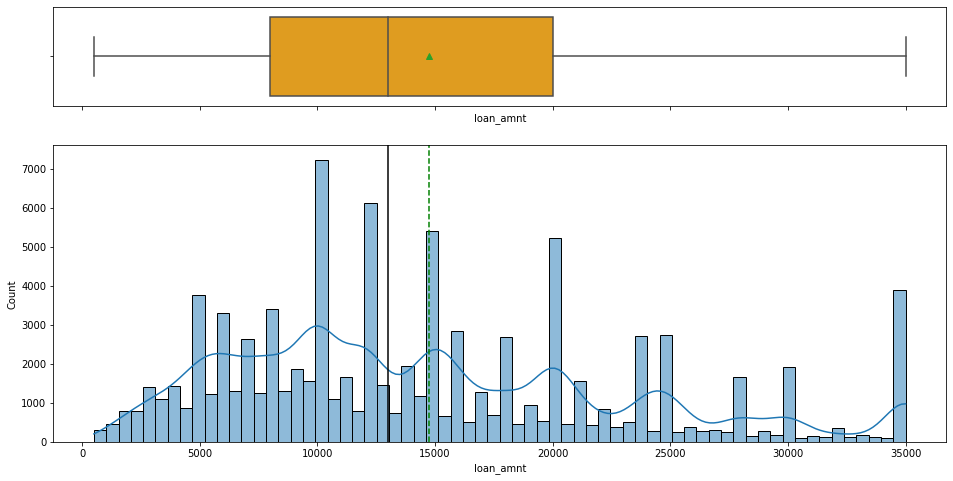

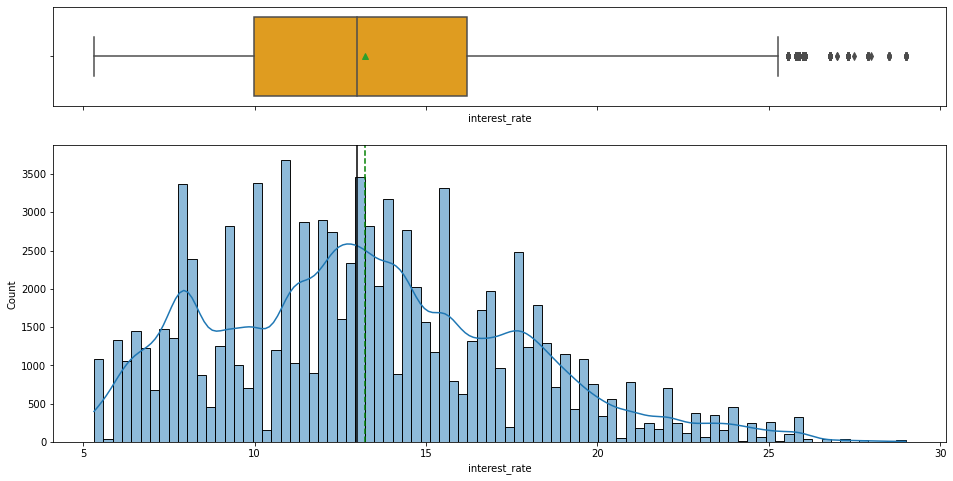

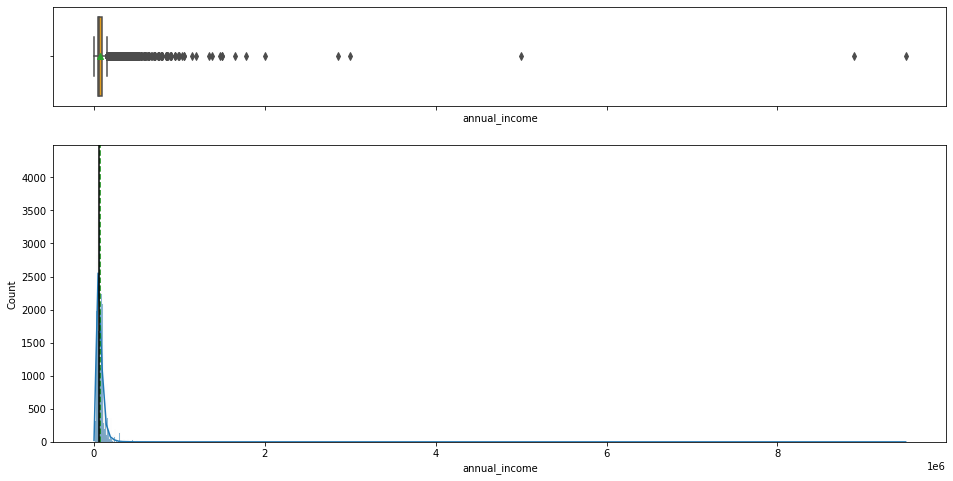

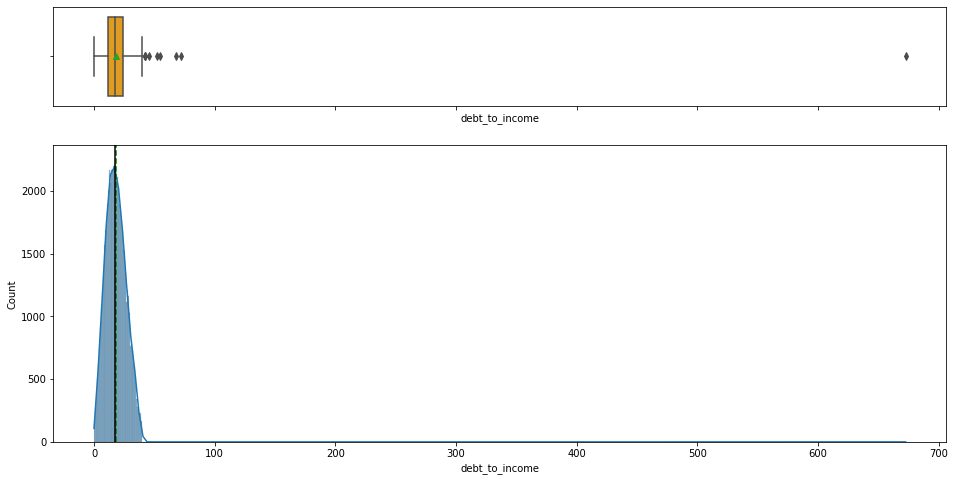

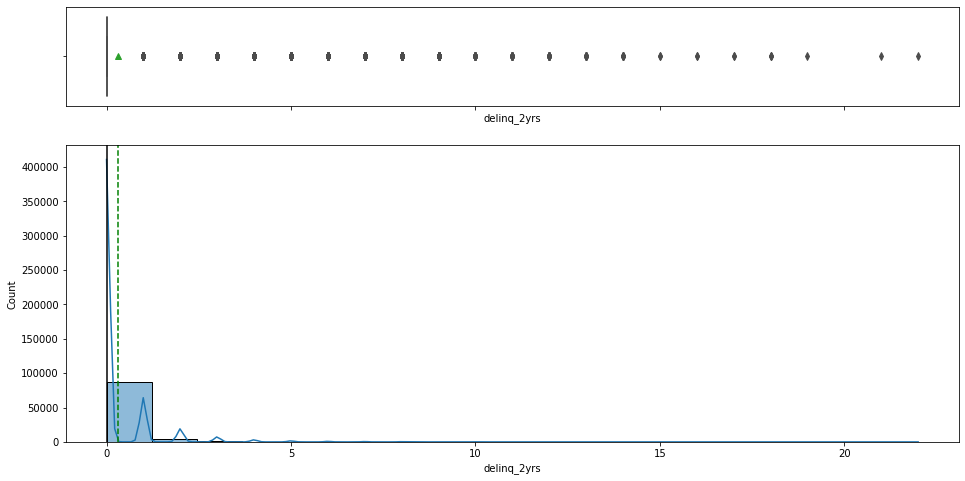

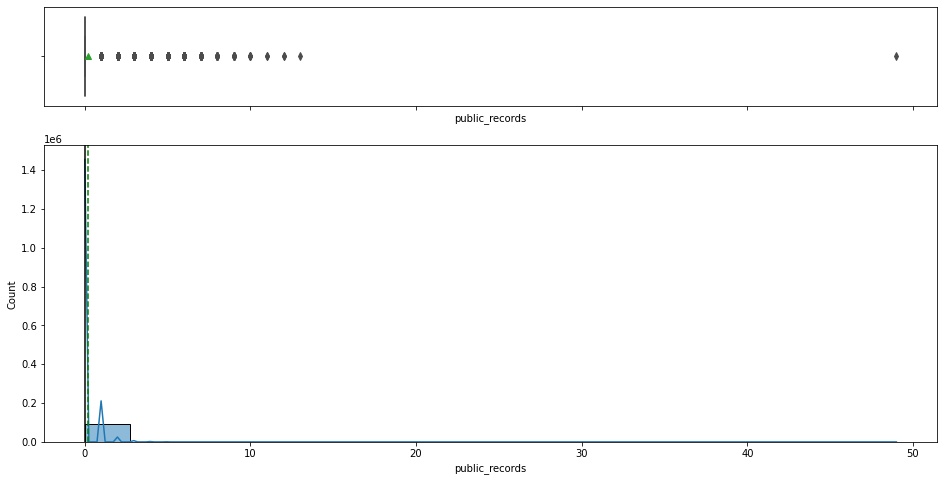

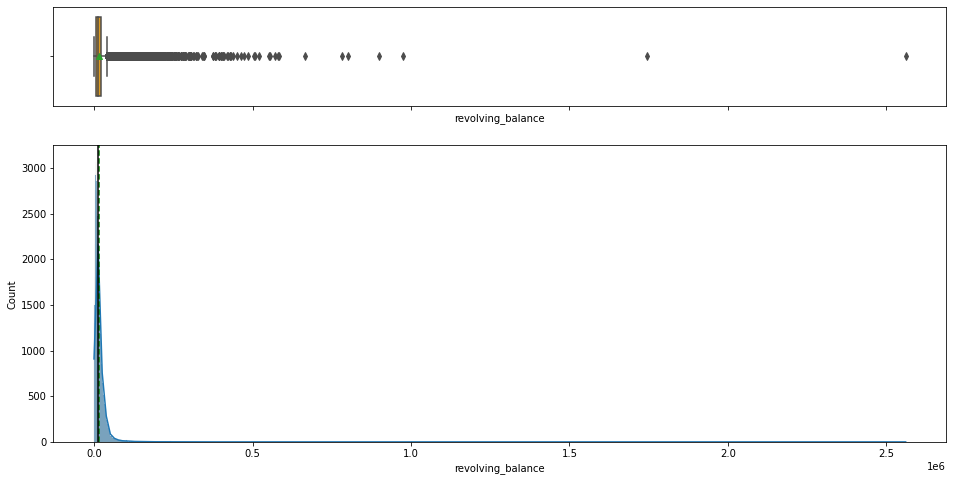

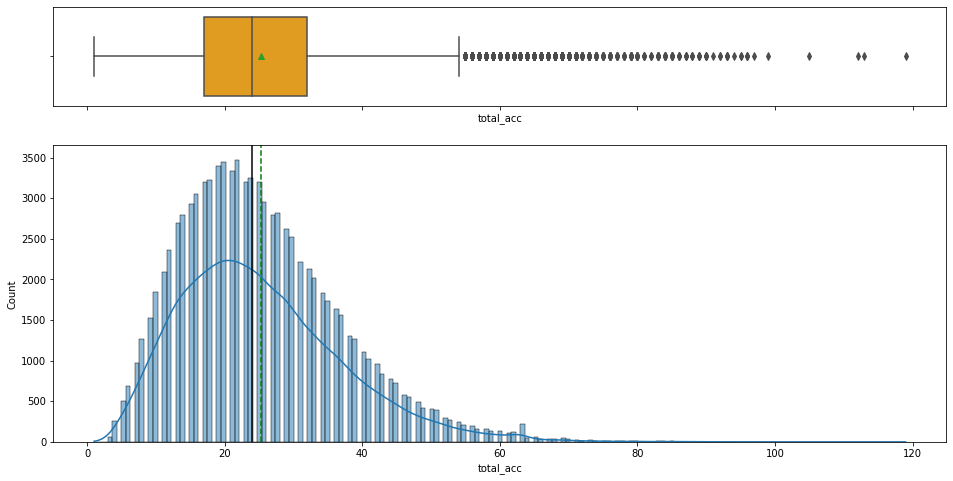

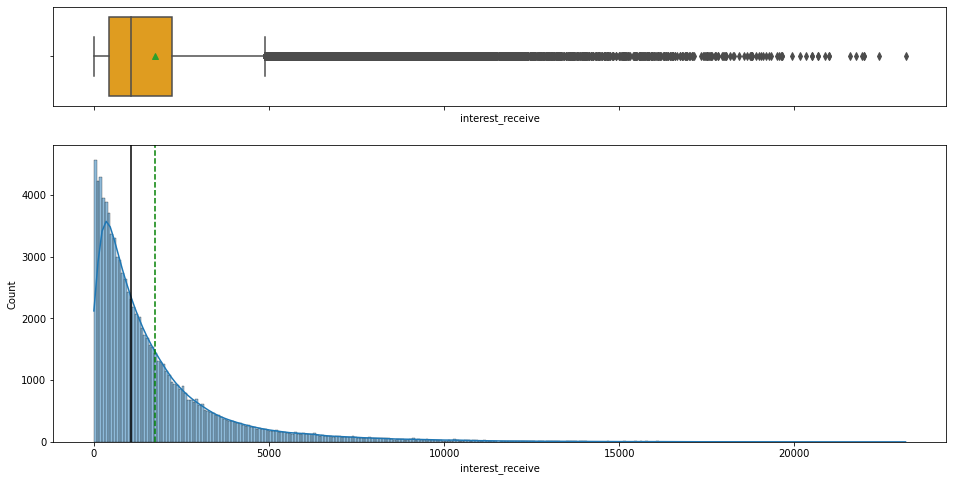

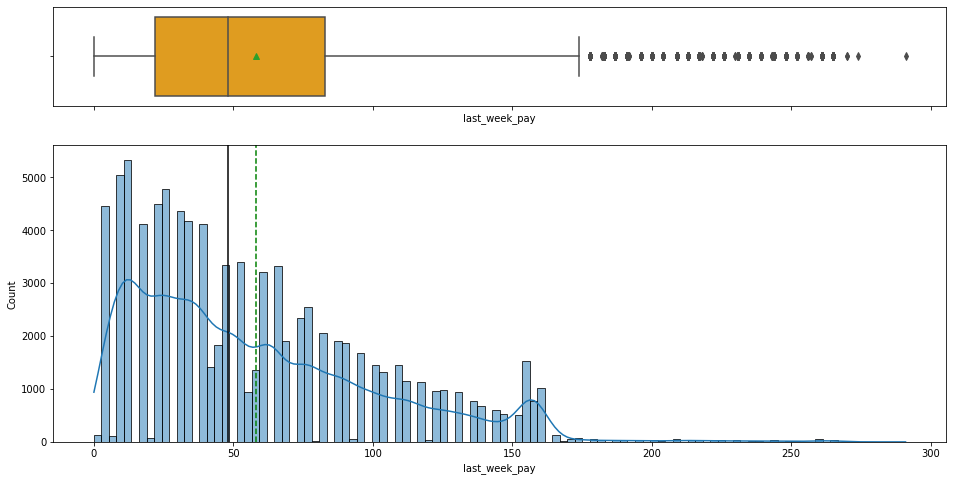

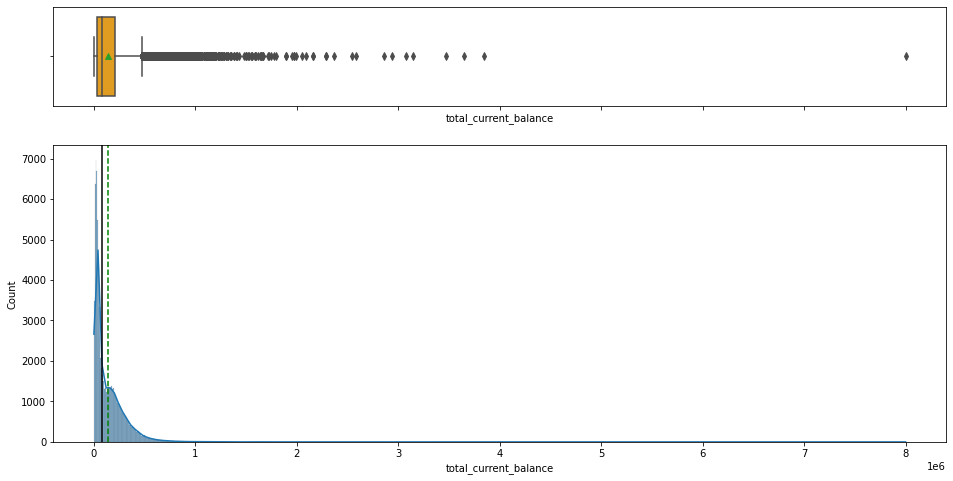

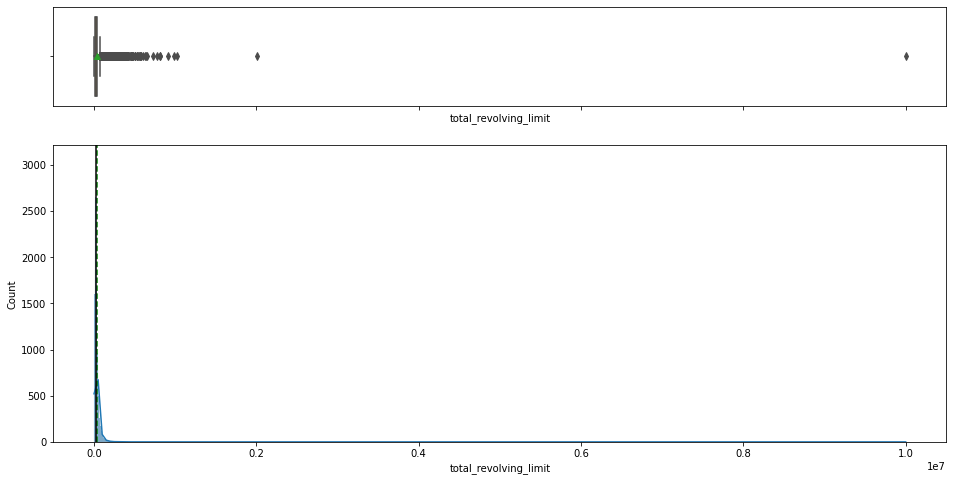

In [ ]:
train_num_cols=train[['loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc', 'interest_receive', 'last_week_pay', 'total_current_balance', 'total_revolving_limit' ]]

for item in train_num_cols:
    hist_box(train, item, kde=True, figsize=(16, 8))

- All numeric columns appear to be right skewed with outliers to the right in all except for loan_amt, which is also right skewed but contains no outliers.

- several of these are likely due to missing values
- with the data all being skewed we will use the median to input missing values.

In [ ]:
med_imputer = SimpleImputer(strategy='median')

impute_med_cols = ['annual_income', 'delinq_2yrs', 'public_records', 'total_acc', 'last_week_pay', 'total_current_balance', 'total_revolving_limit']

train[impute_med_cols] = imputer.fit_transform(train[impute_med_cols])

In [ ]:
test[impute_med_cols] = imputer.fit_transform(test[impute_med_cols])

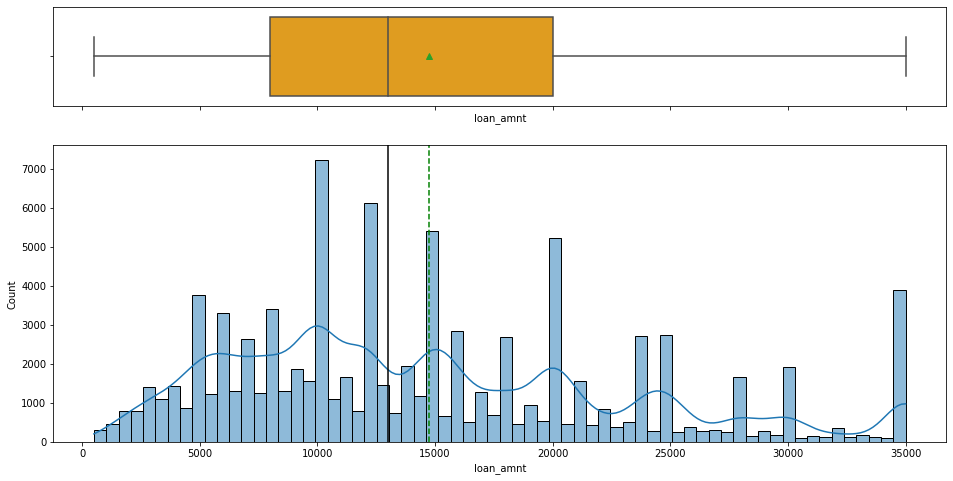

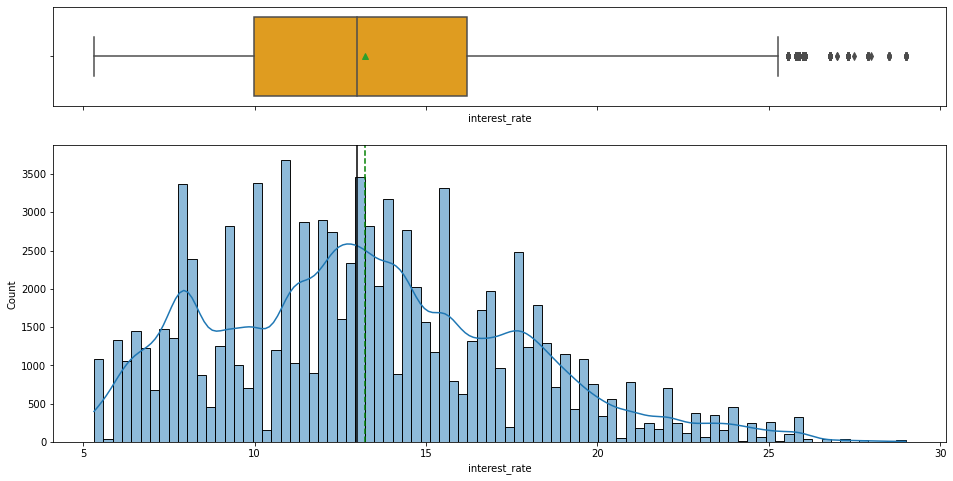

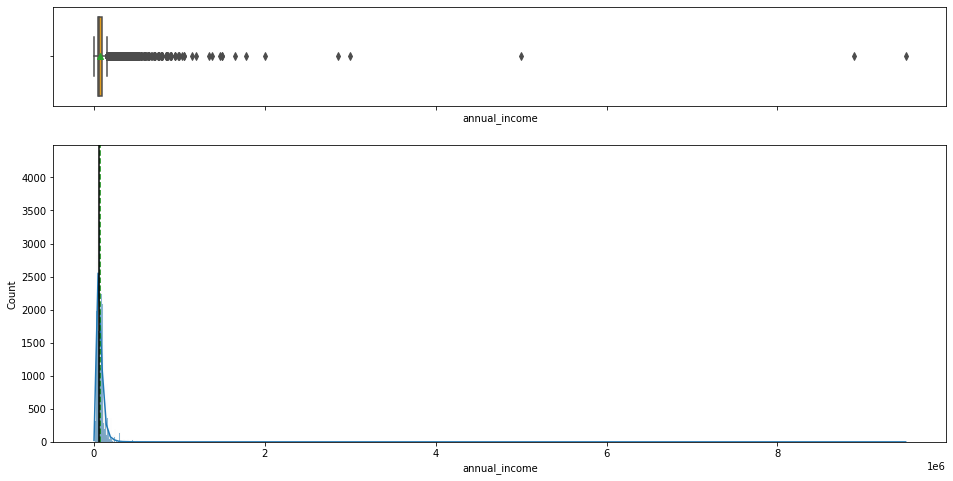

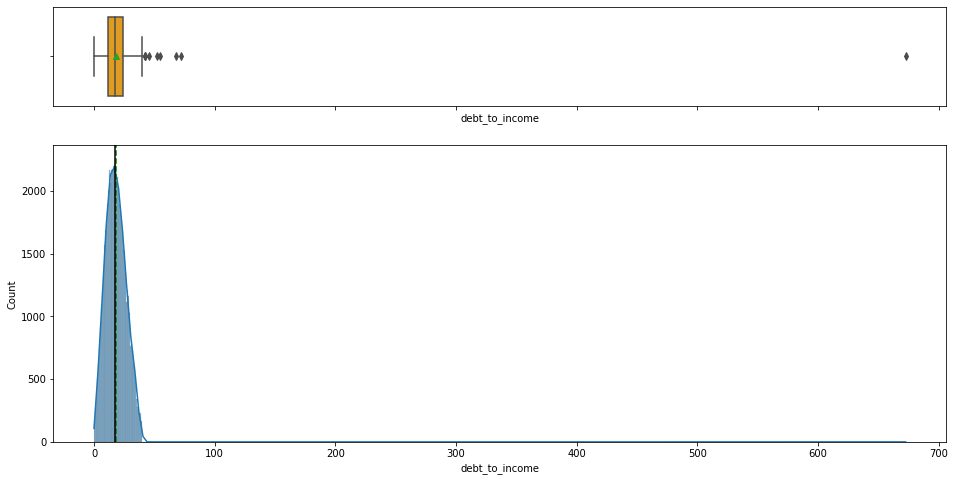

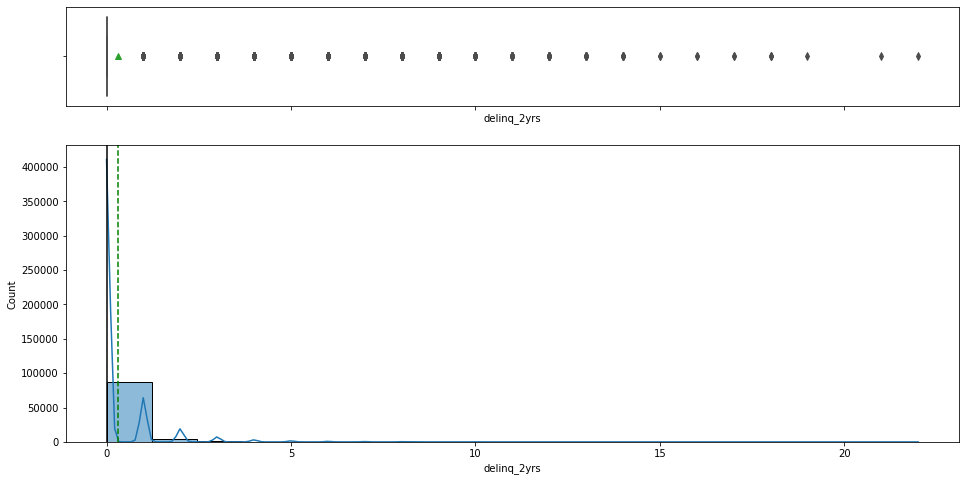

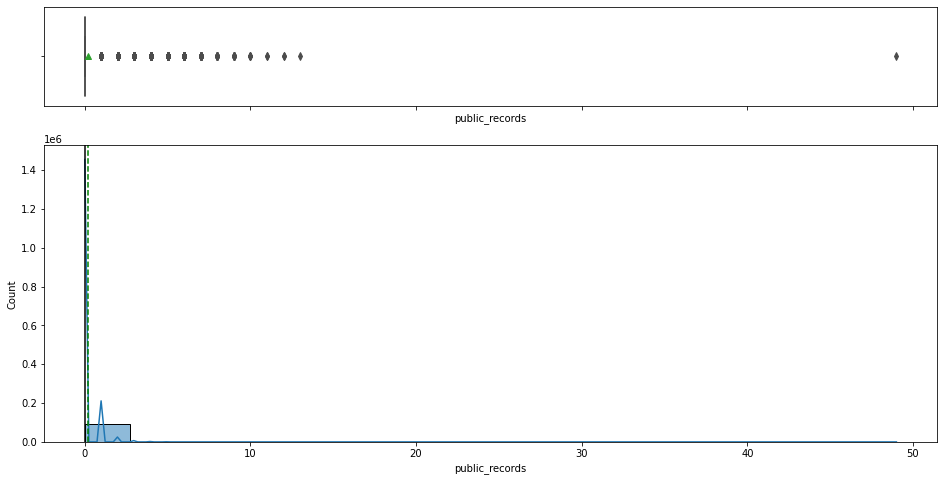

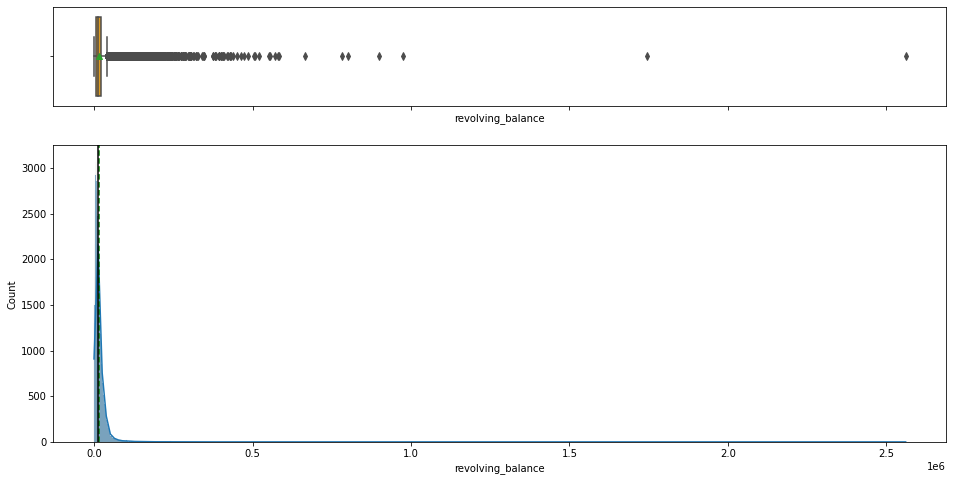

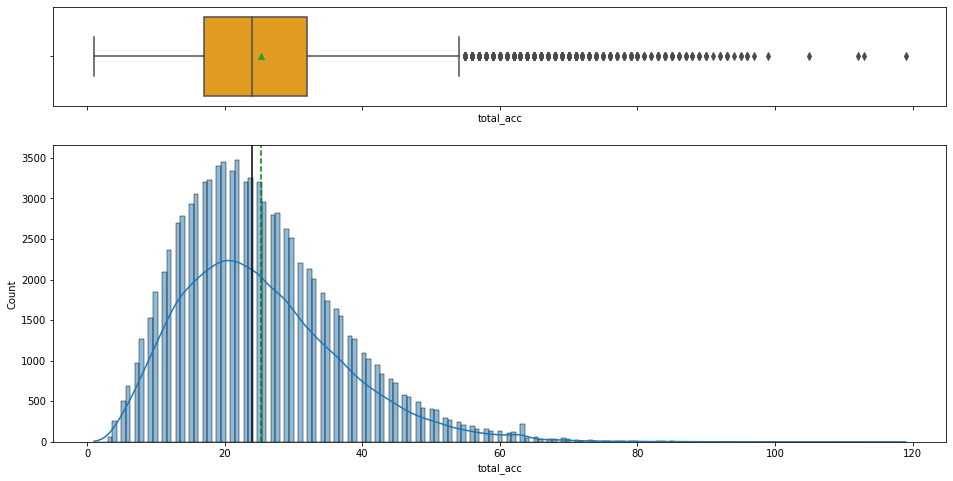

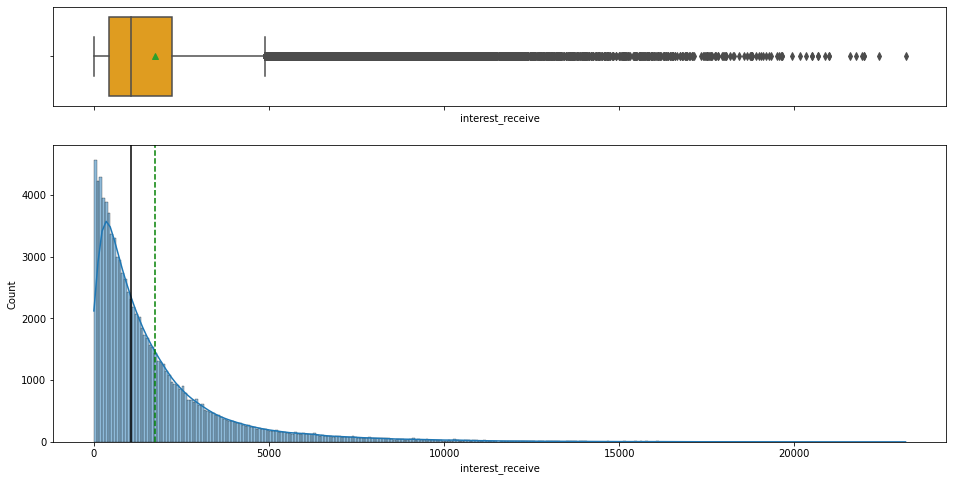

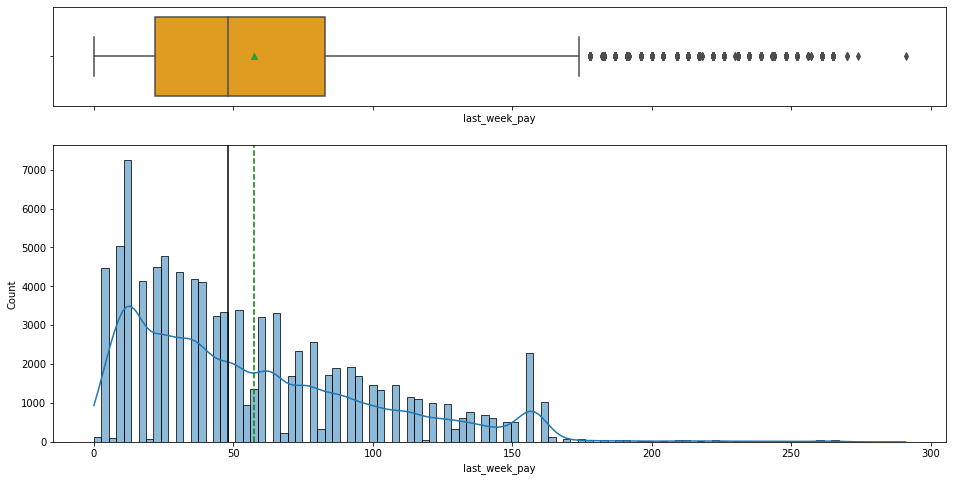

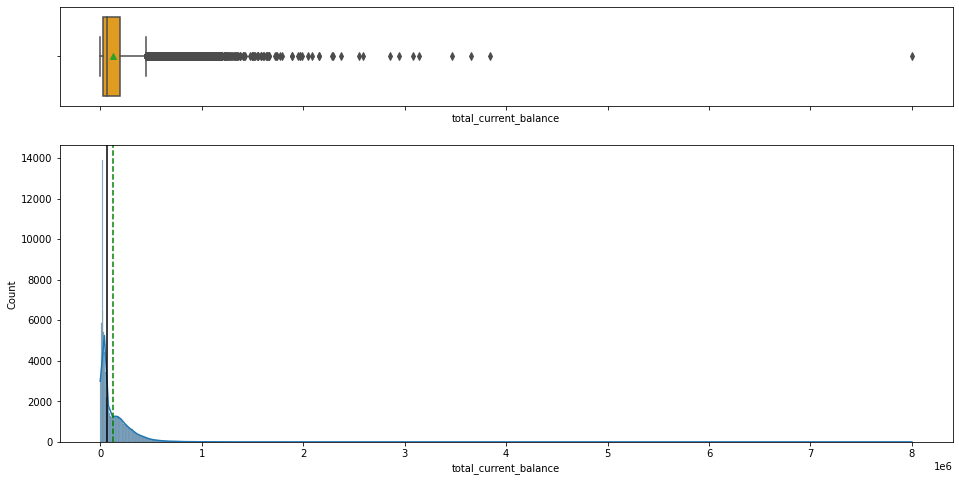

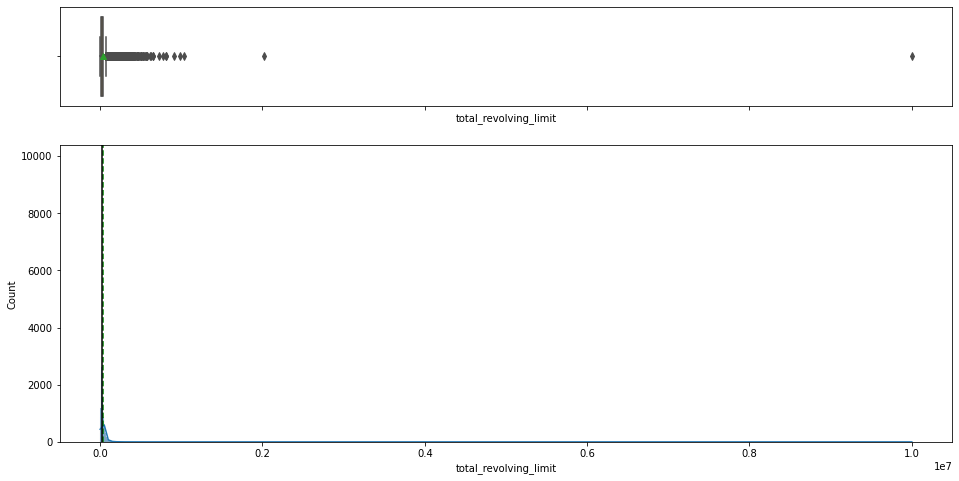

In [ ]:
test_imputed_num_cols=test[['loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc', 'interest_receive', 'last_week_pay', 'total_current_balance', 'total_revolving_limit' ]]

for item in test_imputed_num_cols:
    hist_box(train, item, kde=True, figsize=(16, 8))

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature]) 
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='Paired',
        order = data[feature].value_counts().index[:n].sort_values()
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0,5),
            textcoords='offset points',
        )

    plt.show()

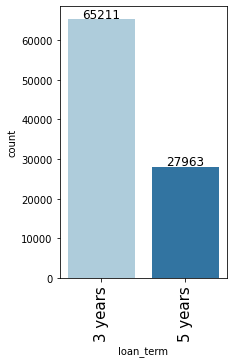

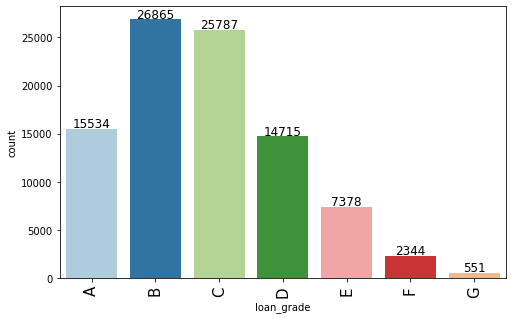

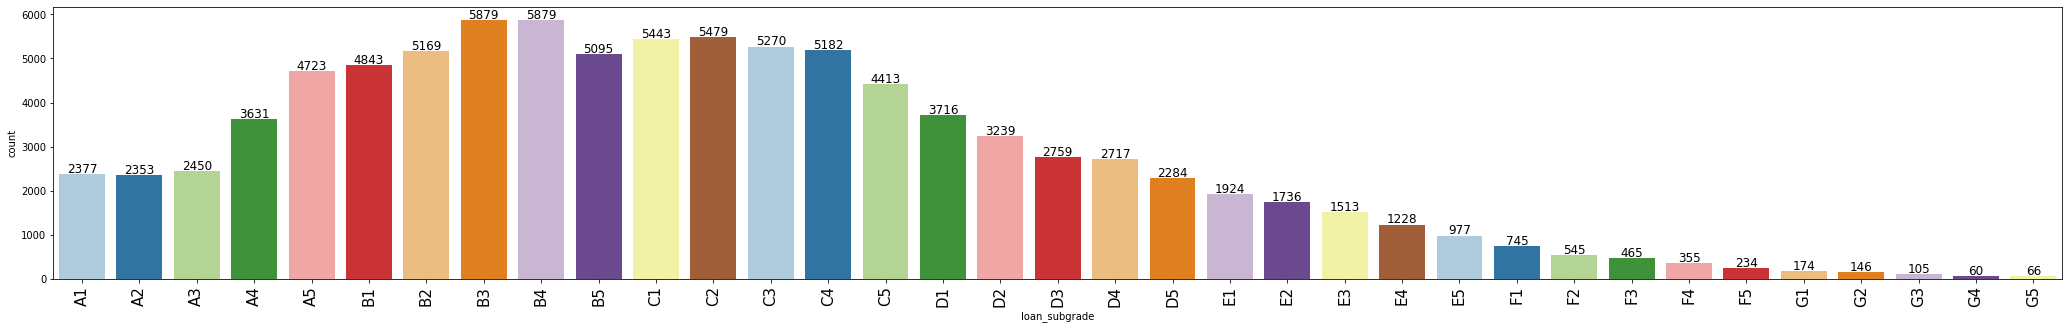

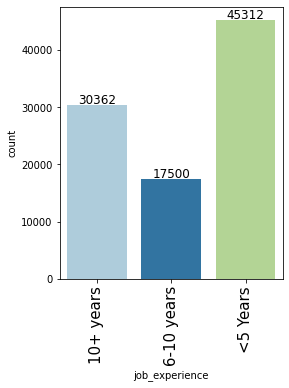

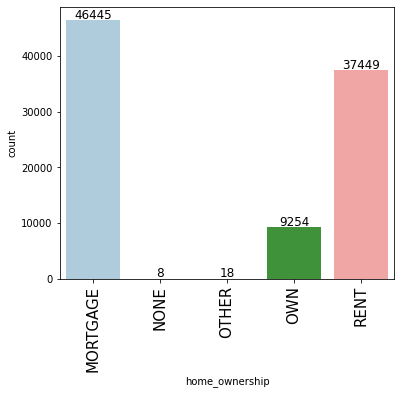

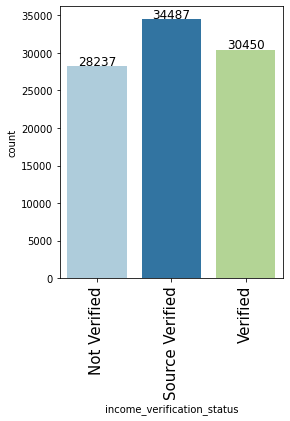

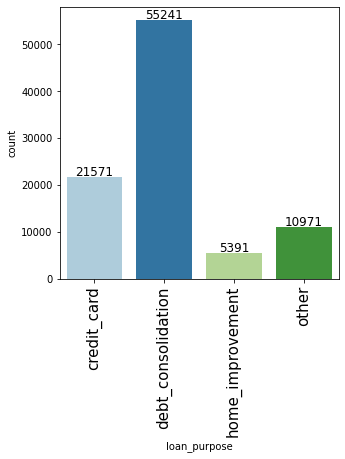

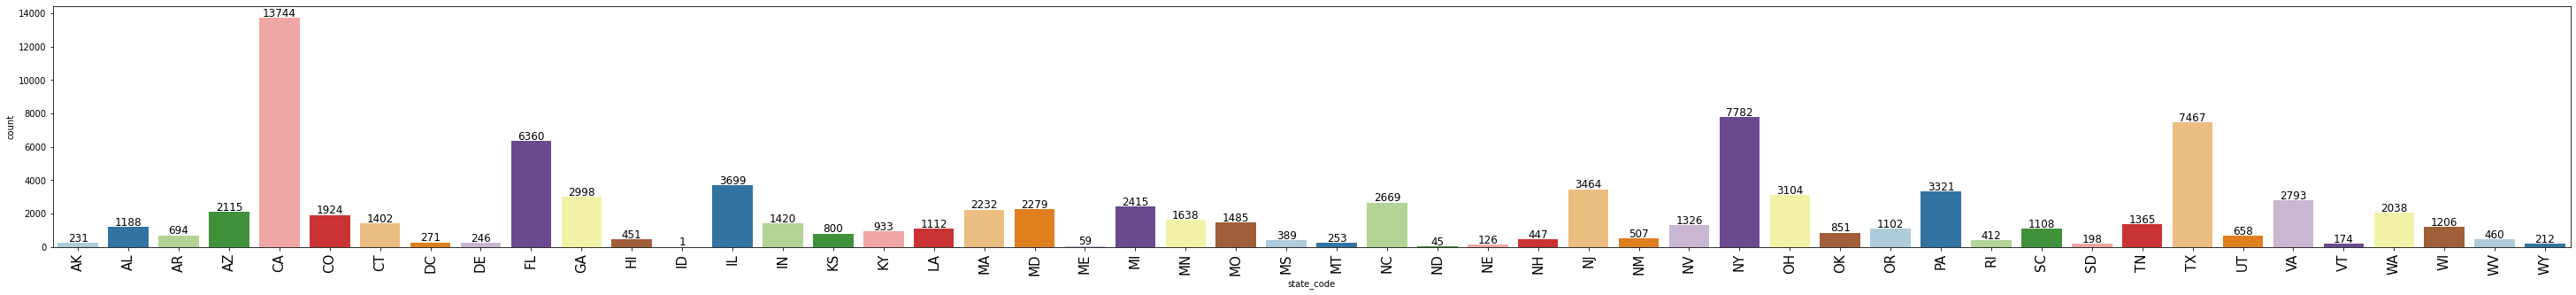

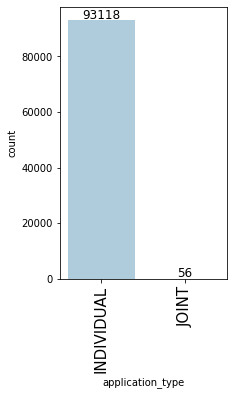

In [ ]:
for item in train_cat_cols:
    labeled_barplot(train, item, perc=False, n=None)

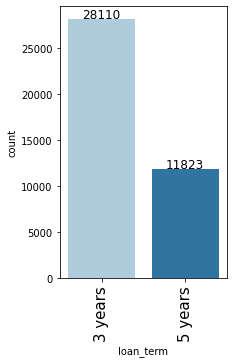

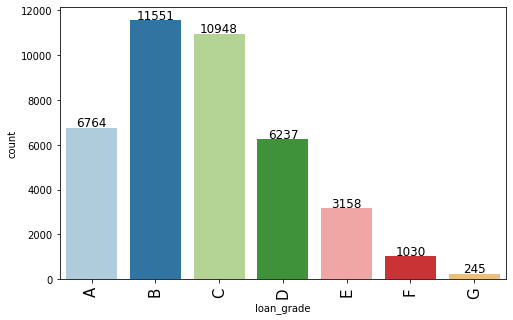

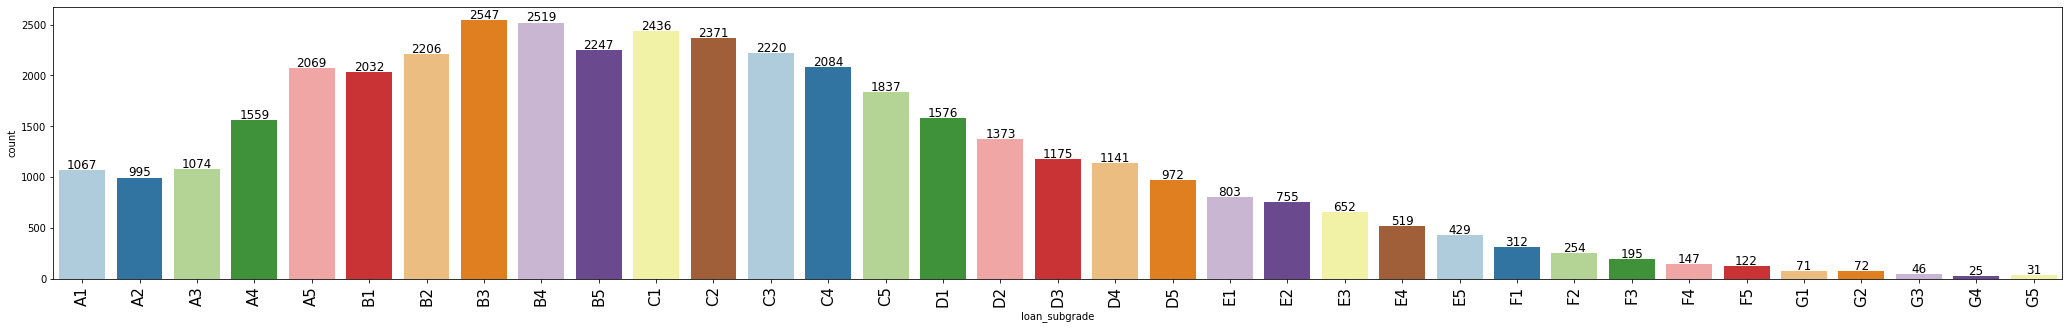

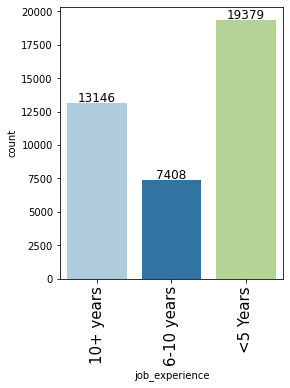

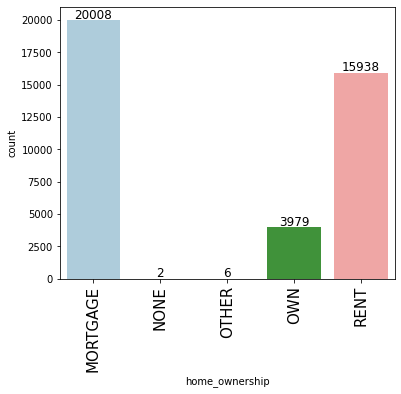

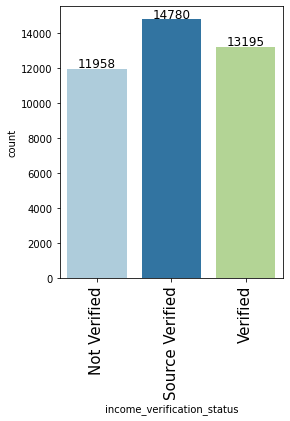

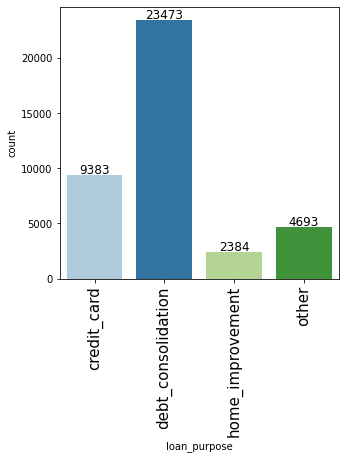

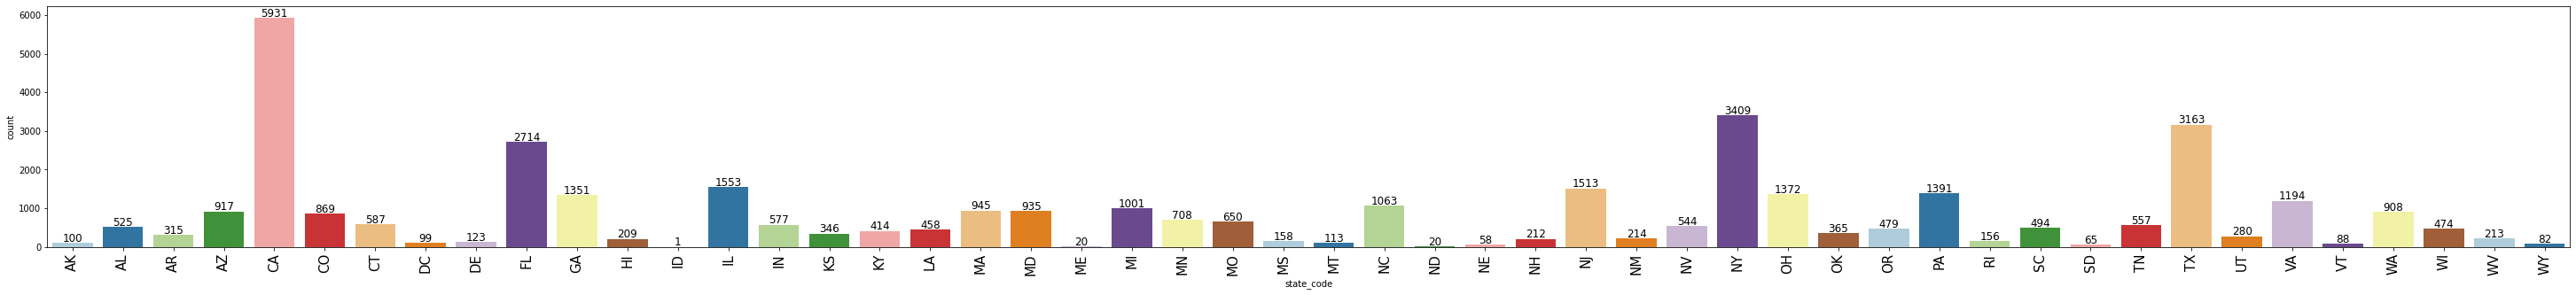

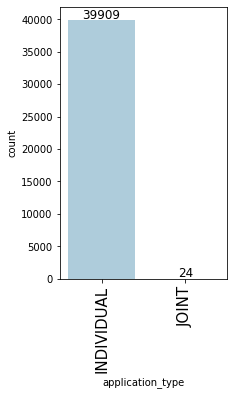

In [ ]:
for item in test_cat_cols:
    labeled_barplot(test, item, perc=False, n=None)

- similar proportions are seem across train and test

In [ ]:
train['default'].value_counts()

0    71045
1    22129
Name: default, dtype: int64

- Our target variable is imbalanced with 1-(defaulters) being less than 1/3 the number of 0-(non-defaulters).

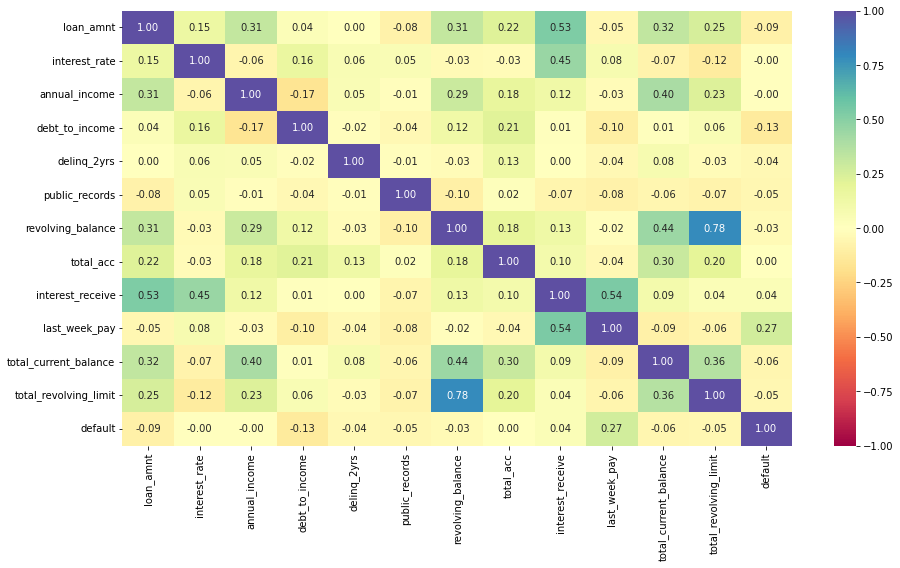

In [ ]:
# creating a heatmap to check for correlations
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral');

- total revolving balance and total revolving limit have a high correlation which is expected none of the other variables have a very high correlation so I don't believe we are at risk of any multicollinearity.

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind='bar', stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc='lower left',
        frameon=False,

    )
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.show()

default        0      1    All
loan_term                     
All        71045  22129  93174
3 years    47345  17866  65211
5 years    23700   4263  27963
------------------------------------------------------------------------------------------------------------------------


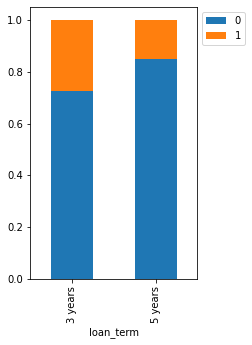

In [ ]:
stacked_barplot(train, 'loan_term', 'default')

- more default on 3 yr. terms vs. 5

default         0      1    All
loan_grade                     
All         71045  22129  93174
B           19787   7078  26865
C           20203   5584  25787
A           11281   4253  15534
D           11478   3237  14715
E            6003   1375   7378
F            1862    482   2344
G             431    120    551
------------------------------------------------------------------------------------------------------------------------


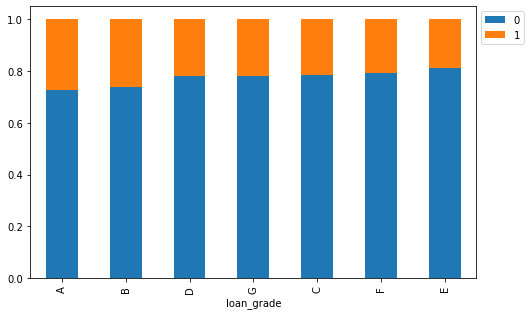

In [ ]:
stacked_barplot(train, 'loan_grade', 'default')

- more defults on A and B

default            0      1    All
loan_subgrade                     
All            71045  22129  93174
B3              4196   1683   5879
B4              4335   1544   5879
B2              3750   1419   5169
C1              4152   1291   5443
B5              3837   1258   5095
C2              4264   1215   5479
B1              3669   1174   4843
A5              3558   1165   4723
A4              2502   1129   3631
C3              4150   1120   5270
C4              4161   1021   5182
C5              3476    937   4413
D1              2932    784   3716
D2              2462    777   3239
A3              1731    719   2450
D3              2114    645   2759
A2              1710    643   2353
A1              1780    597   2377
D4              2154    563   2717
D5              1816    468   2284
E1              1598    326   1924
E3              1206    307   1513
E2              1436    300   1736
E4               996    232   1228
E5               767    210    977
F1               590

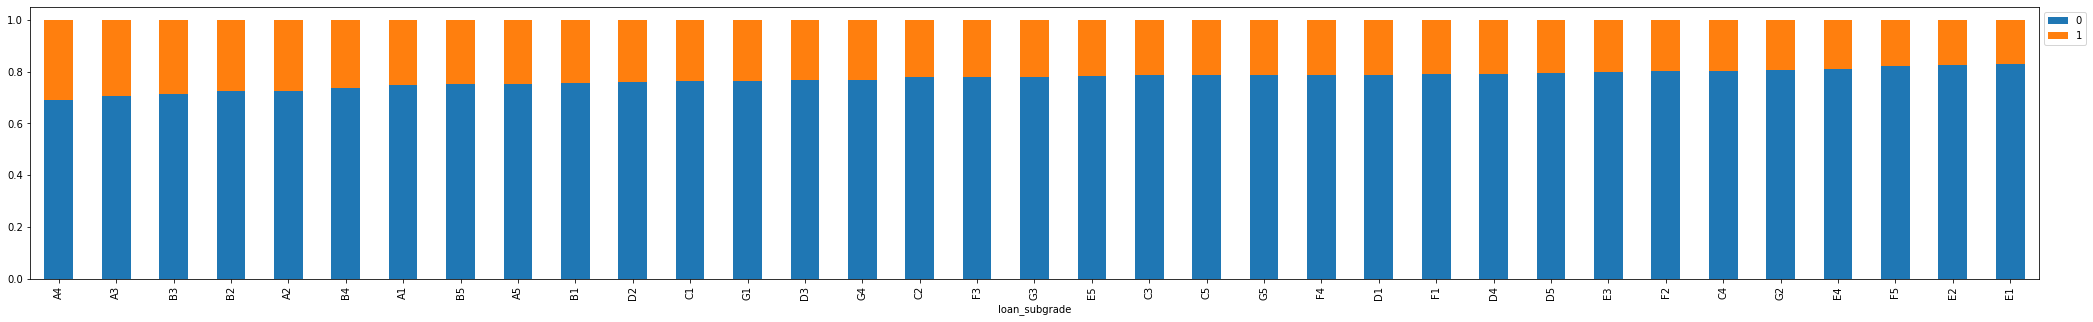

In [ ]:
stacked_barplot(train, 'loan_subgrade', 'default')

- very close ration on default vs. non default amongst subgrades with A4 havig the most defaults but only by a slight margin.

default             0      1    All
job_experience                     
All             71045  22129  93174
<5 Years        34282  11030  45312
10+ years       23656   6706  30362
6-10 years      13107   4393  17500
------------------------------------------------------------------------------------------------------------------------


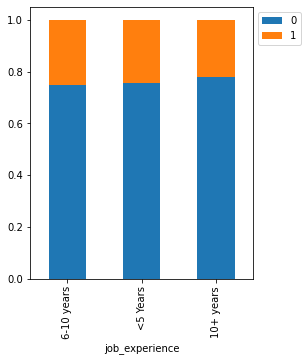

In [ ]:
stacked_barplot(train, 'job_experience', 'default')

- job experience doesn't seem to have a significant impact on whether or not one will default.

default             0      1    All
home_ownership                     
All             71045  22129  93174
MORTGAGE        35316  11129  46445
RENT            28401   9048  37449
OWN              7323   1931   9254
OTHER               3     15     18
NONE                2      6      8
------------------------------------------------------------------------------------------------------------------------


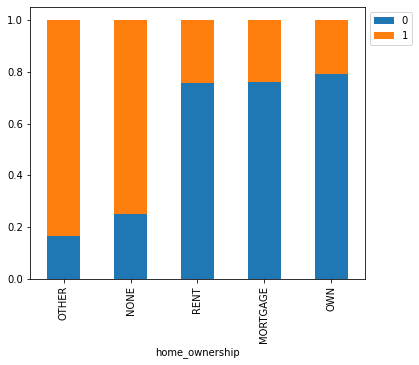

In [ ]:
stacked_barplot(train, 'home_ownership', 'default')

- those whose home ownership is defined as other or none have a mcuh higher chance of defaulting on their loans.

default                         0      1    All
income_verification_status                     
All                         71045  22129  93174
Not Verified                20329   7908  28237
Verified                    22654   7796  30450
Source Verified             28062   6425  34487
------------------------------------------------------------------------------------------------------------------------


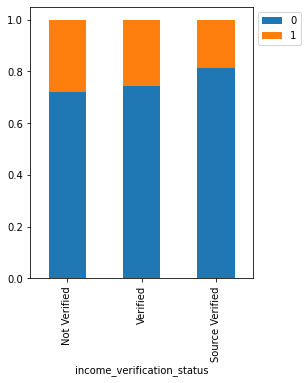

In [ ]:
stacked_barplot(train, 'income_verification_status', 'default')

- source verified incomes have a lower chance of defaulting

default                 0      1    All
loan_purpose                           
All                 71045  22129  93174
debt_consolidation  42408  12833  55241
credit_card         17006   4565  21571
other                7563   3408  10971
home_improvement     4068   1323   5391
------------------------------------------------------------------------------------------------------------------------


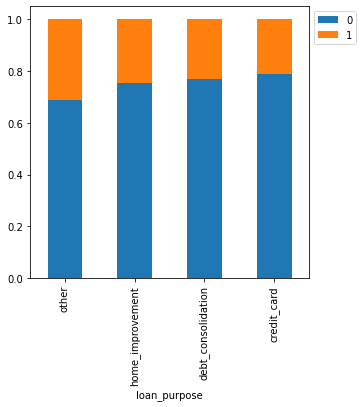

In [ ]:
stacked_barplot(train, 'loan_purpose', 'default')

- loan purpose listed as other has a higher chance of defaulting

default         0      1    All
state_code                     
All         71045  22129  93174
CA           9905   3839  13744
NY           5886   1896   7782
TX           5748   1719   7467
FL           4876   1484   6360
IL           2864    835   3699
NJ           2640    824   3464
PA           2616    705   3321
GA           2324    674   2998
VA           2141    652   2793
OH           2467    637   3104
NC           2050    619   2669
MA           1648    584   2232
MD           1704    575   2279
AZ           1583    532   2115
WA           1517    521   2038
MI           1911    504   2415
CO           1431    493   1924
MN           1254    384   1638
NV            983    343   1326
MO           1144    341   1485
CT           1083    319   1402
OR            805    297   1102
AL            915    273   1188
WI            940    266   1206
SC            847    261   1108
LA            854    258   1112
IN           1188    232   1420
KY            731    202    933
TN      

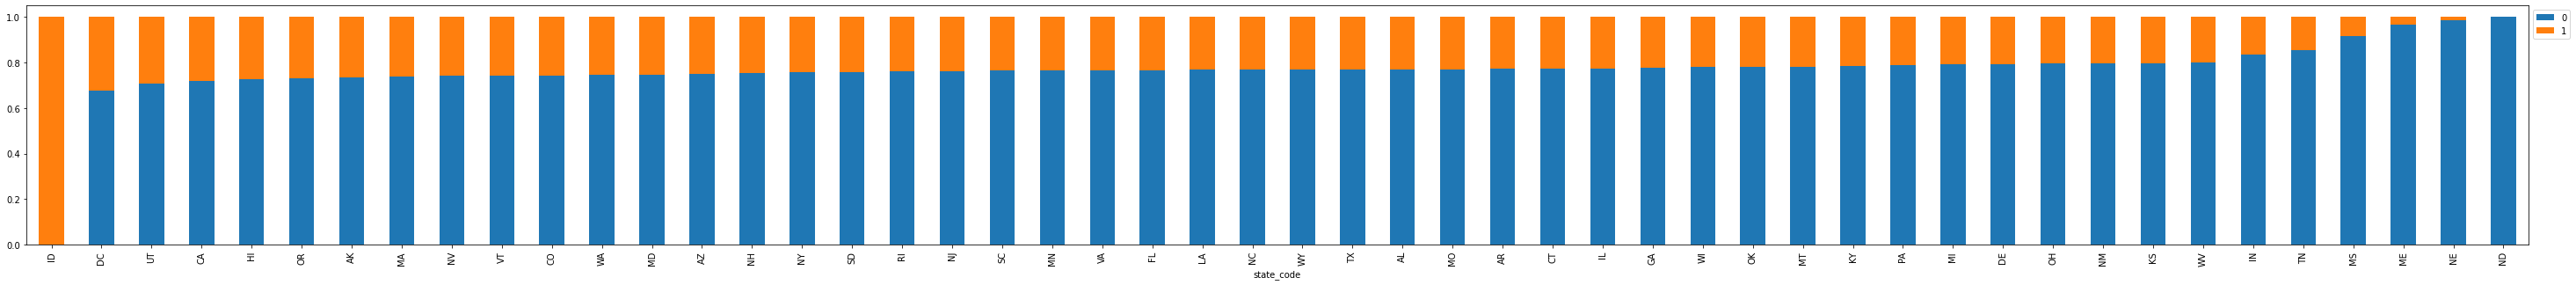

In [ ]:
stacked_barplot(train, 'state_code', 'default')

- Idaho shows a 100% default rate but only 1 loan was given there so not that telling big picture wise.
- Now North Dakota has a 100% non-default rate out of 45 which while still a relatively small number does show some promise for the customer demographics receiving loans in that state.
- Maine, Nebraska, and Missippi all show very low default rates with somewhat higher total loans, so the demographics of those receiving loans in these states may also be of some significance.

default               0      1    All
application_type                     
INDIVIDUAL        70989  22129  93118
All               71045  22129  93174
JOINT                56      0     56
------------------------------------------------------------------------------------------------------------------------


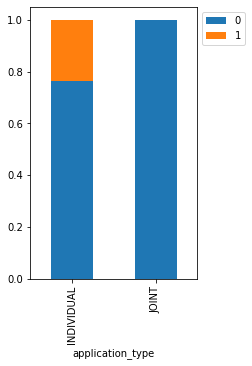

In [ ]:
stacked_barplot(train, 'application_type', 'default')

- there were no defaults on joint applications which is interesting, but since there were only 56 joint apps out of 93,118 this is not as significant as it would seem.

In [ ]:
X = train.drop('default', axis=1)
Y = train['default']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

In [ ]:
x_train = pd.get_dummies(x_train,columns= ['loan_term','loan_grade','loan_subgrade','job_experience','home_ownership','income_verification_status','loan_purpose','state_code','application_type'],drop_first =True)
x_test = pd.get_dummies(x_test,columns= ['loan_term','loan_grade','loan_subgrade','job_experience','home_ownership','income_verification_status','loan_purpose','state_code','application_type'],drop_first =True)

In [ ]:
scaler = StandardScaler()

x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(74539, 114)
(18635, 114)
(74539,)
(18635,)


In [ ]:
def model_perf_class_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame(
        {
            'Accuracy': acc,
            'Recall': recall,
            'Precision': precision,
            'F1': f1
        },
        index=[0]
    )

    return df_perf

In [ ]:
def conf_mat_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.array(
        [
            ['{0:0.0f}'.format(item) +  '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2,2)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train_normalized, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
rf_estimator_train_perf=model_perf_class_sklearn(rf_estimator, x_train_normalized, y_train)
print("Training performance:\n", rf_estimator_train_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
rf_estimator_test_perf=model_perf_class_sklearn(rf_estimator, x_test_normalized, y_test)
print("Testing performance:\n", rf_estimator_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.821465  0.301175    0.85067  0.444852


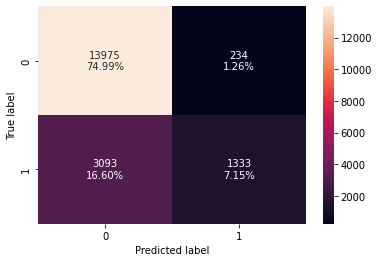

In [ ]:
conf_mat_sklearn(rf_estimator, x_test_normalized , y_test)

In [ ]:
test.drop('ID', axis=1, inplace=True)

In [ ]:
test = pd.get_dummies(test,columns= ['loan_term','loan_grade','loan_subgrade','job_experience','home_ownership','income_verification_status','loan_purpose','state_code','application_type'],drop_first=True)

In [ ]:
test = scaler.transform(test)

In [ ]:
test_results = pd.DataFrame(rf_estimator.predict(test))

In [ ]:
test_set['default'] = test_results

In [ ]:
test_set.head(2)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,...,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.0,128098.0,25800.0,0
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.0,Not Verified,...,0.0,0.0,7592,14.0,202.68,INDIVIDUAL,13.0,269396.0,23600.0,0


In [ ]:
predictions = test_set.copy()

In [ ]:
random_forest_predictions = pd.DataFrame(predictions[['ID', 'default']])

In [ ]:
random_forest_predictions['default'].value_counts()

0    37958
1     1975
Name: default, dtype: int64

In [ ]:
random_forest_predictions

,ID,default
0,4855329,0
1,66862420,0
2,3637416,0
3,53682249,0
4,53937165,0
...,...,...
39928,57779318,0
39929,59742362,0
39930,72657145,0
39931,15220189,0


In [ ]:
random_forest_predictions.to_csv('random_forest_prediction.csv', index=False)

In [ ]:
rf_tuned = RandomForestClassifier(class_weight={0:0.24, 1:0.76}, random_state=1, oob_score=True, bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5, 15, 5)) + [None],
                'max_features': ['sqrt', 'log2', None],
                'min_samples_leaf': np.arange(1, 10, 5),
                'min_samples_split': np.arange(2, 15, 5),
                'n_estimators': np.arange(10, 25, 10)}

scorer = metrics.make_scorer(metrics.accuracy_score)

grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(x_train_normalized, y_train)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(x_train_normalized, y_train)

RandomForestClassifier(class_weight={0: 0.24, 1: 0.76}, max_features=None,
                       min_samples_leaf=6, n_estimators=20, oob_score=True,
                       random_state=1)

In [ ]:
rf_tuned_results = pd.DataFrame(rf_tuned.predict(test))

In [ ]:
test_set['default'] = rf_tuned_results

In [ ]:
rf_tuned_predictions = test_set.copy()

In [ ]:
rf_tuned_df = pd.DataFrame(rf_tuned_predictions[['ID', 'default']])

In [ ]:
rf_tuned_df['default'].value_counts()

0    33601
1     6332
Name: default, dtype: int64

In [ ]:
rf_tuned_df

,ID,default
0,4855329,1
1,66862420,0
2,3637416,1
3,53682249,0
4,53937165,0
...,...,...
39928,57779318,0
39929,59742362,0
39930,72657145,0
39931,15220189,0


In [ ]:
rf_tuned_df.to_csv('rf_tuned.csv', index=False)

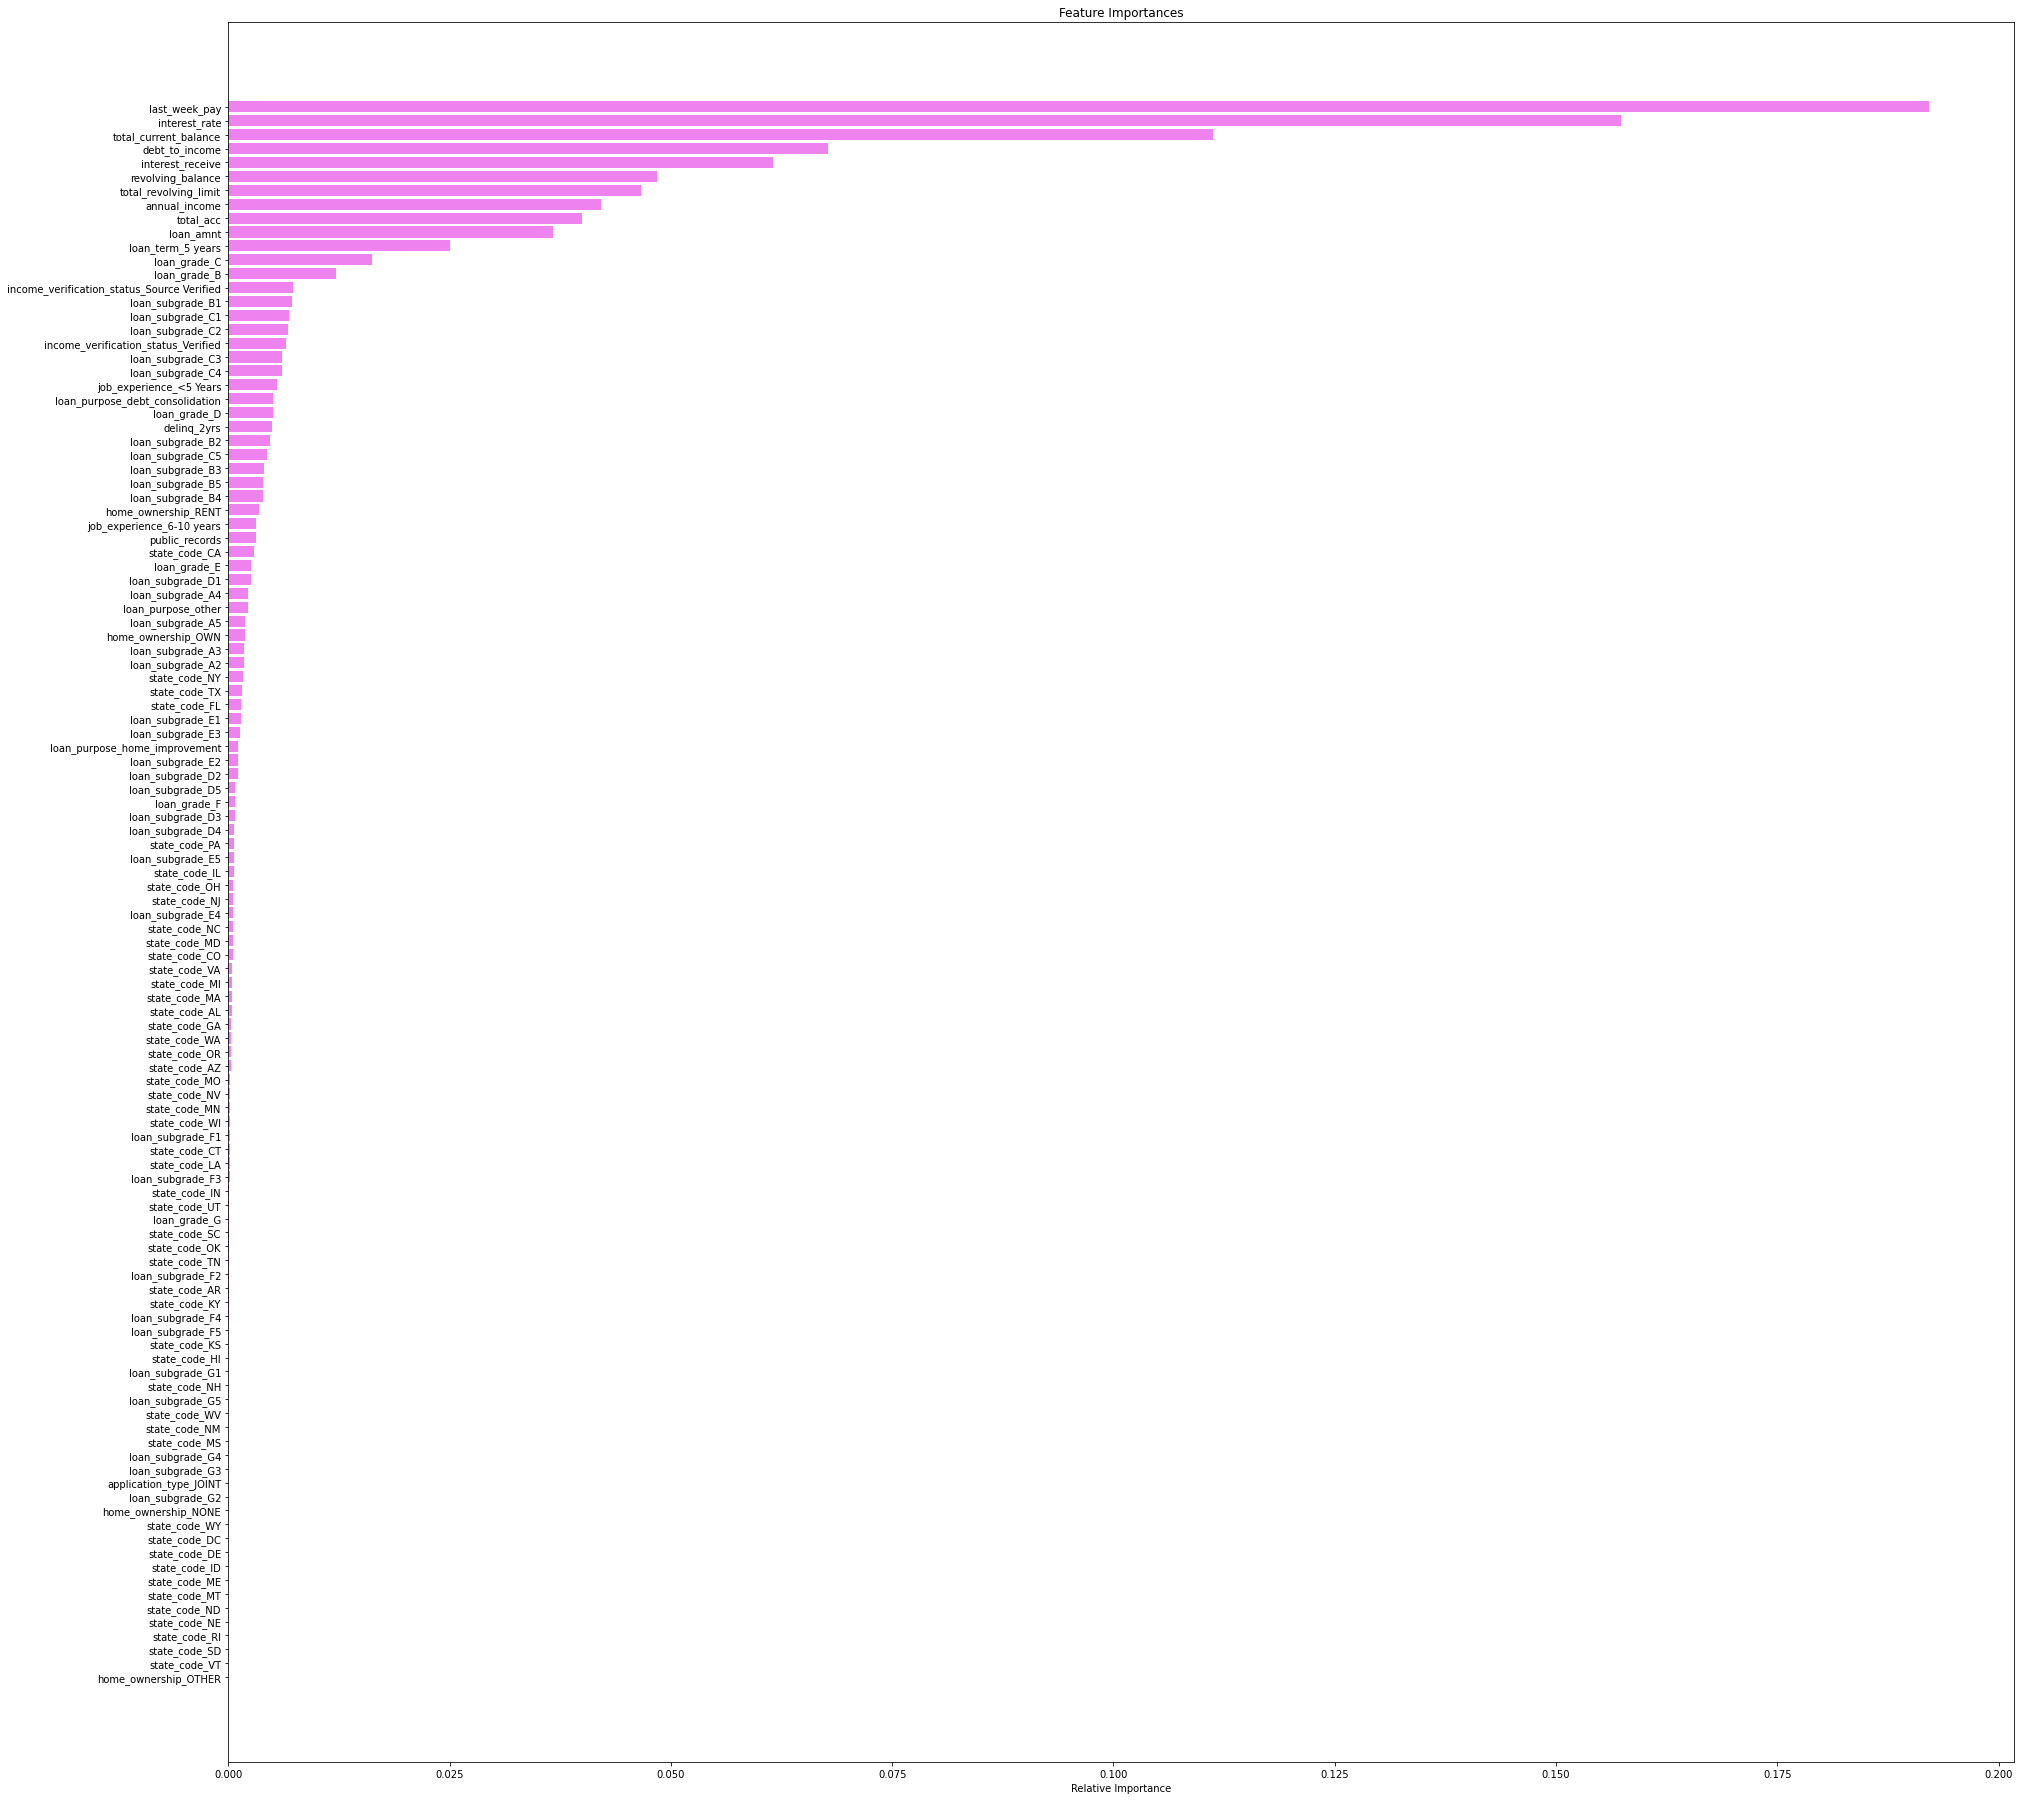

In [ ]:
feature_names = x_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(32,32))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
rf_tuned_feature_importance_df = pd.DataFrame(train[['last_week_pay', 'interest_rate', 'total_current_balance', 'debt_to_income', 'interest_receive', 'revolving_balance', 'total_revolving_limit', 'annual_income', 'total_acc', 'loan_amnt', 'default']])

In [ ]:
rf_tuned_feature_importance_df.head()

,last_week_pay,interest_rate,total_current_balance,debt_to_income,interest_receive,revolving_balance,total_revolving_limit,annual_income,total_acc,loan_amnt,default
0,4.0,9.17,95493.0,26.68,59.60,39519.0,84100.0,85000.0,20.0,9000.0,0
1,95.0,13.65,185433.0,31.67,3348.25,9783.0,13500.0,64000.0,24.0,18000.0,0
2,13.0,7.26,180519.0,19.70,276.69,13641.0,19300.0,150000.0,27.0,16000.0,0
3,17.0,13.99,183208.0,37.39,1106.72,35020.0,55400.0,59800.0,35.0,25000.0,0
4,39.0,6.39,23990.0,8.92,725.29,23990.0,81300.0,72000.0,26.0,17000.0,0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

In [ ]:
features = rf_tuned_feature_importance_df.drop(['default'], axis=1)
target = rf_tuned_feature_importance_df['default']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [ ]:
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
X_train_normalized.shape

(74539, 10)

In [ ]:
X_test_normalized.shape

(18635, 10)

In [ ]:
Y_train.shape

(74539,)

In [ ]:
Y_test.shape

(18635,)

In [ ]:
np.random.seed(1)

import random
random.seed(1)

tf.random.set_seed(1)

In [ ]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(10,)))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
history = model.fit(X_train_normalized, Y_train, validation_split=0.1, epochs=50, verbose=1)

Epoch 1/50
2097/2097 [==============================] - 16s 6ms/step - loss: 0.4944 - accuracy: 0.7890 - val_loss: 0.4751 - val_accuracy: 0.7978
Epoch 2/50
2097/2097 [==============================] - 13s 6ms/step - loss: 0.4803 - accuracy: 0.7946 - val_loss: 0.4677 - val_accuracy: 0.8025
Epoch 3/50
2097/2097 [==============================] - 13s 6ms/step - loss: 0.4729 - accuracy: 0.7988 - val_loss: 0.4711 - val_accuracy: 0.8006
Epoch 4/50
2097/2097 [==============================] - 13s 6ms/step - loss: 0.4684 - accuracy: 0.8005 - val_loss: 0.4675 - val_accuracy: 0.7994
Epoch 5/50
2097/2097 [==============================] - 14s 7ms/step - loss: 0.4650 - accuracy: 0.8034 - val_loss: 0.4665 - val_accuracy: 0.8029
Epoch 6/50
2097/2097 [==============================] - 13s 6ms/step - loss: 0.4632 - accuracy: 0.8035 - val_loss: 0.4634 - val_accuracy: 0.8052
Epoch 7/50
2097/2097 [==============================] - 13s 6ms/step - loss: 0.4602 - accuracy: 0.8055 - val_loss: 0.4618 - val_ac